<a href="https://colab.research.google.com/github/lili-hdz/inteligencia_artificial/blob/main/XOR_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicio XOR
Practica de Redes Neuronales / MULTICAPA

---
Liliana Patricia Hernandez Cruz

Datos

In [10]:
import numpy as np
#Importo la libreria que voy a usar

# Datos XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])


Red Neuronal Multicapa

In [11]:
from tensorflow.keras.models import Sequential #Hace que las capas se apilen de manera lineal
from tensorflow.keras.layers import Dense  #Hace que cada neurona recibe conexion de todas las neuronas de la capa anterior

modelo = Sequential([
    Dense(4, activation='relu', input_dim=2),
    Dense(1, activation='sigmoid')
])
#Estructura del modelo de la red neuronal en la que se tiene una capa oculta usando "relu"
#y una capa de salida "sigmoid" para clasificar la respuesta en 1 y 0 (2 clases).


Compilar el modelo

In [12]:
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.01
adam_optimizer = Adam(learning_rate=learning_rate)

#Usamos el optimizador Adam para minimizar el error y acelerar el entrenamiento.


In [13]:
modelo.compile(
    optimizer=adam_optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)
#Compilamos el modelo con el optimizador, la pérdida y la metrica "exactitud"
#Usamos la función de pérdida de entropía cruzada categórica dispersa (binary_crossentropy) para la clasificación.

Entrenar al modelo

In [14]:
history = modelo.fit(
    X, y,
    epochs=50,
    verbose=0,
)

#Es un objeto que guarda la evolucion del error y la precisión a lo largo de las épocas
#Se entrena el modelo con ".fit" y con el número de épocas

Graficar la función de pérdida

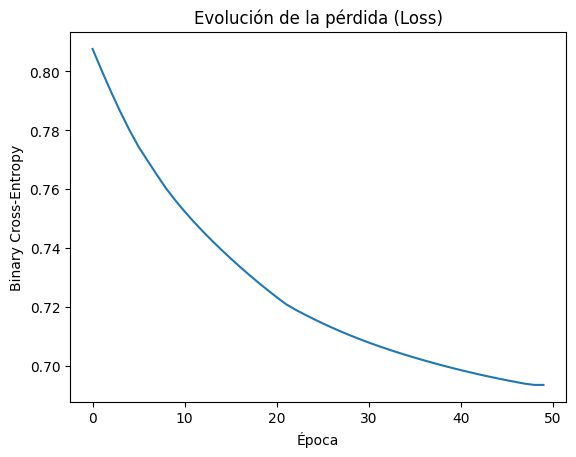

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Evolución de la pérdida (Loss)')
plt.xlabel('Época')
plt.ylabel('Binary Cross-Entropy')
plt.show()

#Usamos la libreria matplotlib para graficar la pérdida en el modelo
#La función debe tender a cero

Evaluación

In [16]:
loss, accuracy = modelo.evaluate(X, y)
print(f'Loss: {loss}, Accuracy: {accuracy}')

#Se obtienen los valores de pérdida y exactitud del modelo con el ".evaluate"

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.2500 - loss: 0.6935
Loss: 0.693507730960846, Accuracy: 0.25


Predicción

In [18]:
pred = (modelo.predict(X) > 0.5).astype(int)
for i, (inp, p) in enumerate(zip(X, pred)):
    print(f"{inp} -> {p[0]}")

#Guarda y hace predicciones con los valores reales del modelo en "pred"

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[0 0] -> 0
[0 1] -> 0
[1 0] -> 0
[1 1] -> 1
